### Importacion de Librerias

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

### Carga de Datasets

In [5]:
df_coursea_course = pd.read_csv('datasets/Coursera_courses.csv')
df_coursea_reviews= pd.read_csv('datasets/Coursera_reviews.csv')
df_edx = pd.read_csv('datasets/edx_courses.csv')
df_udemy = pd.read_csv('datasets/udemy_courses.csv')
df_coursea = pd.merge(df_coursea_course, df_coursea_reviews, on = 'course_id' )
df_coursea = df_coursea.drop_duplicates(subset=['name', 'institution', 'course_id'] ).reset_index(drop=True)
df_coursea.head()



,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,"Mar 18, 2017",1
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,There are several reasons why I rated this cou...,By Art H,"Nov 21, 2017",1
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,The course is mostly about the opinion of the ...,By Julia H,"May 01, 2018",1
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,Course was good overall. I will not take the t...,By Daniel W,"May 23, 2018",1
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4


### Cambio de nombres de las columnas del los diferentes datasets

In [6]:
# Traduccion de columnas de cada uno de los datasets
df_edx = df_edx.rename(columns={
    'title': 'titulo',
    'summary': 'resumen',
    'n_enrolled': 'n_inscritos',
    'course_type': 'tipo_curso',
    'institution': 'institución',
    'instructors': 'instructores',
    'Level': 'nivel',
    'subject': 'tema',
    'language': 'idioma',
    'subtitles': 'subtítulos',
    'course_effort': 'esfuerzo_curso',
    'course_length': 'duración_curso',
    'price': 'precio',
    'course_description': 'descripción_curso',
    'course_syllabus': 'temario_curso',
    'course_url': 'url_curso'
})


df_udemy = df_udemy.rename(columns={
    'course_id': 'id_curso',
    'course_title': 'titulo',
    'url': 'url_curso',
    'is_paid': 'es_pago',
    'price': 'precio',
    'num_subscribers': 'n_inscritos',
    'num_reviews': 'n_reviews',
    'num_lectures': 'n_lecturas',
    'level': 'nivel',
    'content_duration': 'duración_contenido',
    'published_timestamp': 'fecha_publicación',
    'subject': 'tema'
})


df_coursea = df_coursea.rename(columns={
    'name': 'titulo',
    'institution': 'institución',
    'course_url': 'url_curso',
    'course_id': 'id_curso',
    'reviews': 'reseñas',
    'reviewers': 'revisores',
    'date_reviews': 'fecha_reseñas',
    'rating': 'valoración'

})

### Transformaciones de Datasets

In [7]:
# Pequeñas transformacion de un dataset
df_edx['precio'] = df_edx['precio'].str.extract('(\d+)').astype(int)
mean_price = df_edx['precio'].mean()
df_edx['n_inscritos'].fillna(mean_price, inplace=True)
df_edx['n_inscritos'] = df_edx['n_inscritos'].astype(str).str.replace('.', '', regex=False)
df_edx['n_inscritos'] = df_edx['n_inscritos'].astype(str).str.replace(',', '', regex=False)
df_edx['n_inscritos'] = df_edx['n_inscritos'].astype(float)
df_edx['n_inscritos'] = df_edx['n_inscritos'].astype(int)
df_edx = df_edx[df_edx['n_inscritos'] > 0]
df_edx.head()

,titulo,resumen,n_inscritos,tipo_curso,institución,instructores,nivel,tema,idioma,subtítulos,esfuerzo_curso,duración_curso,precio,descripción_curso,temario_curso,url_curso
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,49,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,49,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,90,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,199,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,249,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [8]:
# Cambio tipo de dato de columnas nunericas columnas
df_udemy['precio'] = df_udemy['precio'].astype(int)
df_udemy['n_inscritos'] = df_udemy['n_inscritos'].astype(int)
df_udemy['n_reviews'] = df_udemy['n_reviews'].astype(int)
df_udemy['n_lecturas'] = df_udemy['n_lecturas'].astype(int)
df_udemy.head()


,id_curso,titulo,url_curso,es_pago,precio,n_inscritos,n_reviews,n_lecturas,nivel,duración_contenido,fecha_publicación,tema
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [9]:
df_coursea.head()

,titulo,institución,url_curso,id_curso,reseñas,revisores,fecha_reseñas,valoración
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,"Mar 18, 2017",1
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,There are several reasons why I rated this cou...,By Art H,"Nov 21, 2017",1
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,The course is mostly about the opinion of the ...,By Julia H,"May 01, 2018",1
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,Course was good overall. I will not take the t...,By Daniel W,"May 23, 2018",1
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4


### Tratamiento de datos faltantes

In [10]:

print(df_edx.isnull().sum())
print(df_udemy.isnull().sum())
print(df_coursea.isnull().sum())
df_edx.dropna(inplace=True)
df_udemy.dropna(inplace=True)
df_coursea.dropna(inplace=True)


titulo                 0
resumen               49
n_inscritos            0
tipo_curso             0
institución            0
instructores           3
nivel                  0
tema                   0
idioma                 0
subtítulos             3
esfuerzo_curso         0
duración_curso         0
precio                 0
descripción_curso     33
temario_curso        492
url_curso              0
dtype: int64
id_curso              0
titulo                0
url_curso             0
es_pago               0
precio                0
n_inscritos           0
n_reviews             0
n_lecturas            0
nivel                 0
duración_contenido    0
fecha_publicación     0
tema                  0
dtype: int64
titulo           0
institución      0
url_curso        0
id_curso         0
reseñas          0
revisores        0
fecha_reseñas    0
valoración       0
dtype: int64


# Analisis Exploratorio

In [11]:
df_coursea.describe(include=['object']).T

,count,unique,top,freq
titulo,604,603,Introduction to Psychology,2
institución,604,132,University of Pennsylvania,43
url_curso,604,604,https://www.coursera.org/learn/machine-learning,1
id_curso,604,604,machine-learning,1
reseñas,604,603,I did all four courses - the whole specializat...,2
revisores,604,585,By Deleted A,8
fecha_reseñas,604,459,"Jul 17, 2020",6


In [12]:

df_edx.describe().T


,count,mean,std,min,25%,50%,75%,max
n_inscritos,358.0,42827.726257,78038.526152,5018.0,11178.0,19561.5,44032.0,1103777.0
precio,358.0,102.321229,71.729926,5.0,49.0,99.0,149.0,399.0


In [13]:
df_udemy.describe().T

,count,mean,std,min,25%,50%,75%,max
id_curso,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
precio,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
n_inscritos,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
n_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
n_lecturas,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
duración_contenido,3678.0,4.094517,6.053840,0.0,1.0,2.0,4.50,78.5


### 1.  Udemy tiene un precio maximo en sus cursos de 200 Usd, mientra que Edx de 400 usd

# Grafica de distribución de precios en Udemy y EDX

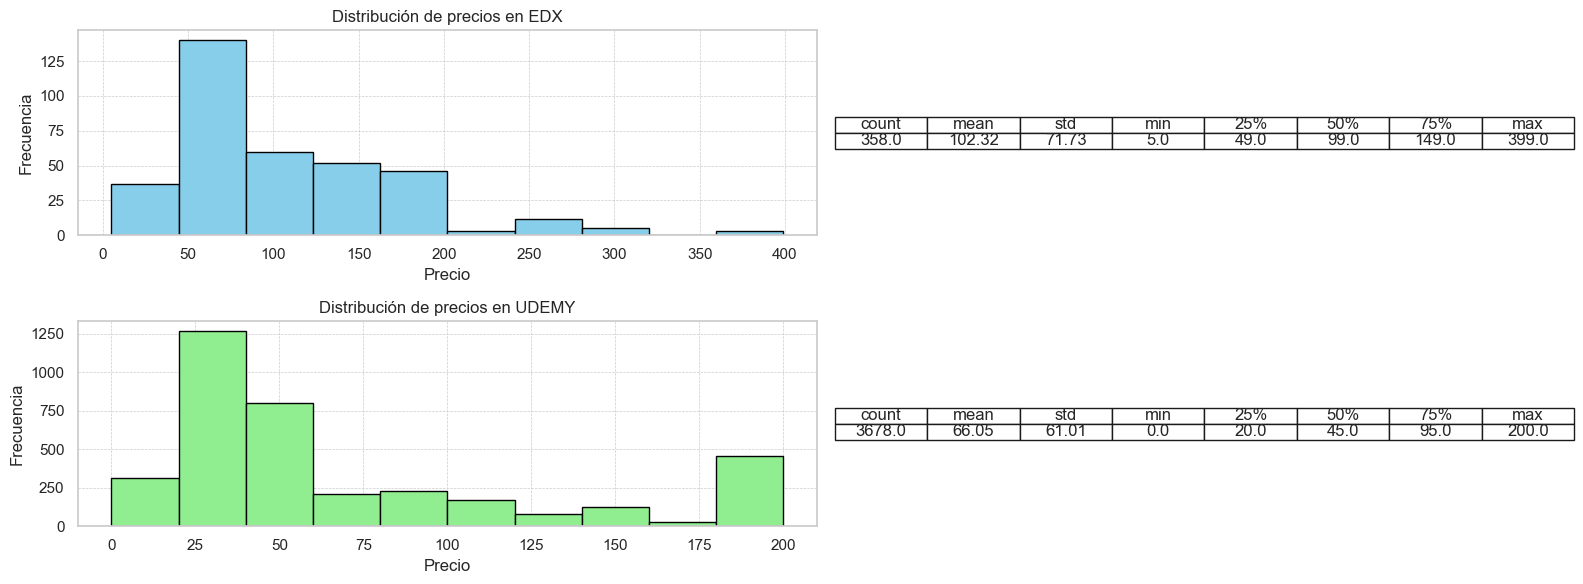

In [14]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 6))

axes[0, 0].hist(df_edx['precio'], bins=10, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Precio')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de precios en EDX')
axes[0, 0].grid(True, linestyle='--', linewidth=0.5)
axes[0, 0].minorticks_on()

axes[0, 1].axis('off')
statistics_edx = df_edx[['precio']].describe().round(2).T
axes[0, 1].table(cellText=statistics_edx.values, colLabels=statistics_edx.columns, cellLoc='center', loc='center')

axes[1, 0].hist(df_udemy['precio'], bins=10, color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Precio')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Distribución de precios en UDEMY')
axes[1, 0].grid(True, linestyle='--', linewidth=0.5)
axes[1, 0].minorticks_on()


axes[1, 1].axis('off')
statistics_udemy = df_udemy[['precio']].describe().round(2).T
axes[1, 1].table(cellText=statistics_udemy.values, colLabels=statistics_udemy.columns, cellLoc='center', loc='center')

plt.tight_layout()

plt.show()




En general, la mayoría de los cursos en edX tienen un costo que oscila entre 50 y 75 USD, mientras que en Udemy se encuentran en el rango de 25 a 50 USD. Es importante destacar que edX no ofrece cursos gratuitos, y el precio mínimo por curso es de 5 USD. Por otro lado, Udemy cuenta con más de 250 cursos gratuitos disponibles.

# Inscritos en Udemy a través del tiempo

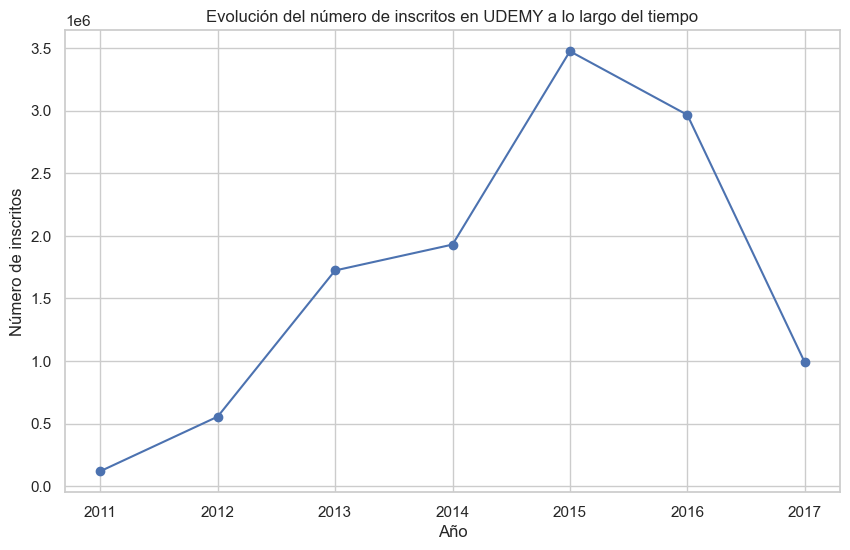

In [15]:

df_udemy['fecha_publicación'] = pd.to_datetime(df_udemy['fecha_publicación'])
df_udemy['year'] = df_udemy['fecha_publicación'].dt.year

plt.figure(figsize=(10, 6))
df_udemy.groupby('year')['n_inscritos'].sum().plot(marker='o')
plt.xlabel('Año')
plt.ylabel('Número de inscritos')
plt.title('Evolución del número de inscritos en UDEMY a lo largo del tiempo')
plt.show()

Udemy experimentó un crecimiento notable hasta 2015, alcanzando un máximo de 3.5 millones de inscritos. Sin embargo, desde entonces ha experimentado una fuerte caída, llegando a tener 1 millón de inscritos en la última fecha del dataset.

# Cantidad de inscritos por tema en Udemy

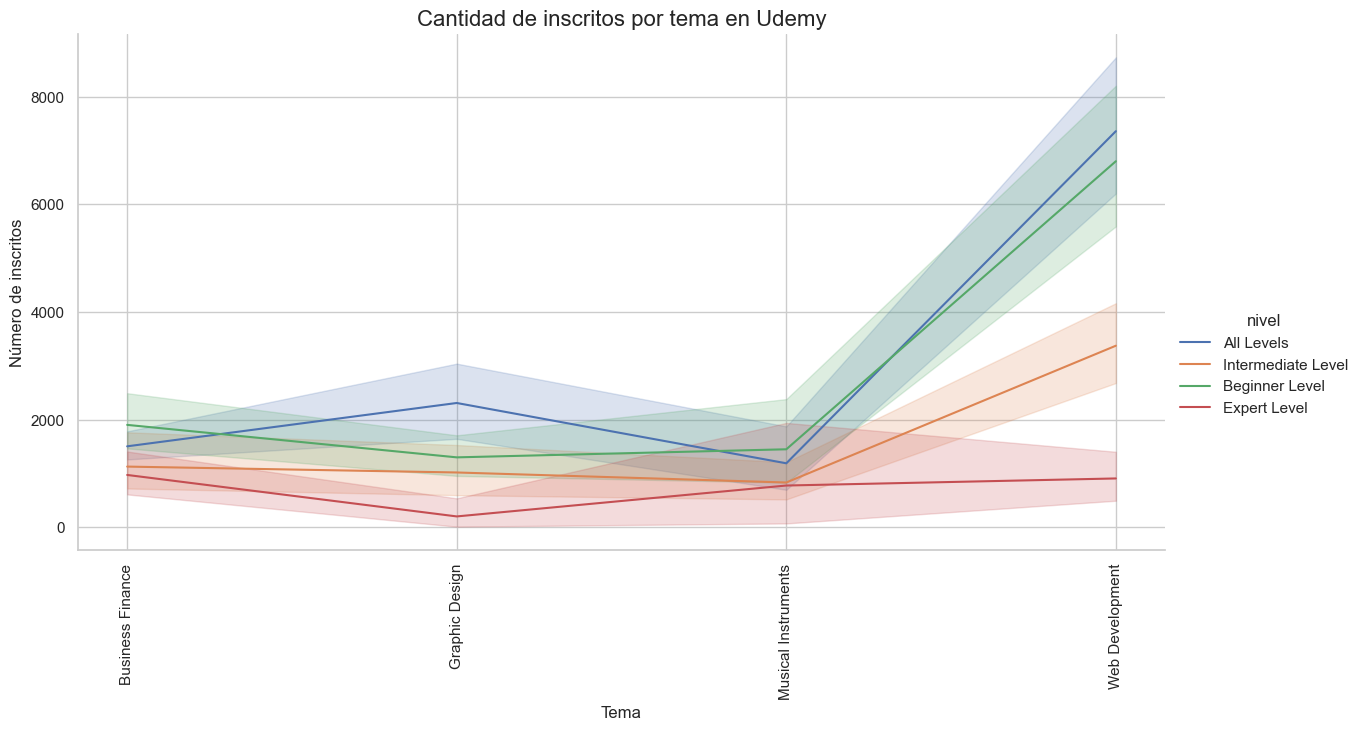

In [46]:
sns.relplot(data=df_udemy, x='tema', y='n_inscritos', hue='nivel', kind='line', height=6, aspect=2)
plt.xlabel('Tema')
plt.ylabel('Número de inscritos')
plt.title('Cantidad de inscritos por tema en Udemy', fontsize=16)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para que se vean completas

plt.show()


El tema de "Desarrollo web" destaca como el más popular en Udemy, con una gran cantidad de inscritos en comparación con otros temas. Esta demanda indica un alto interés de los usuarios por adquirir conocimientos y habilidades relacionadas con el desarrollo web

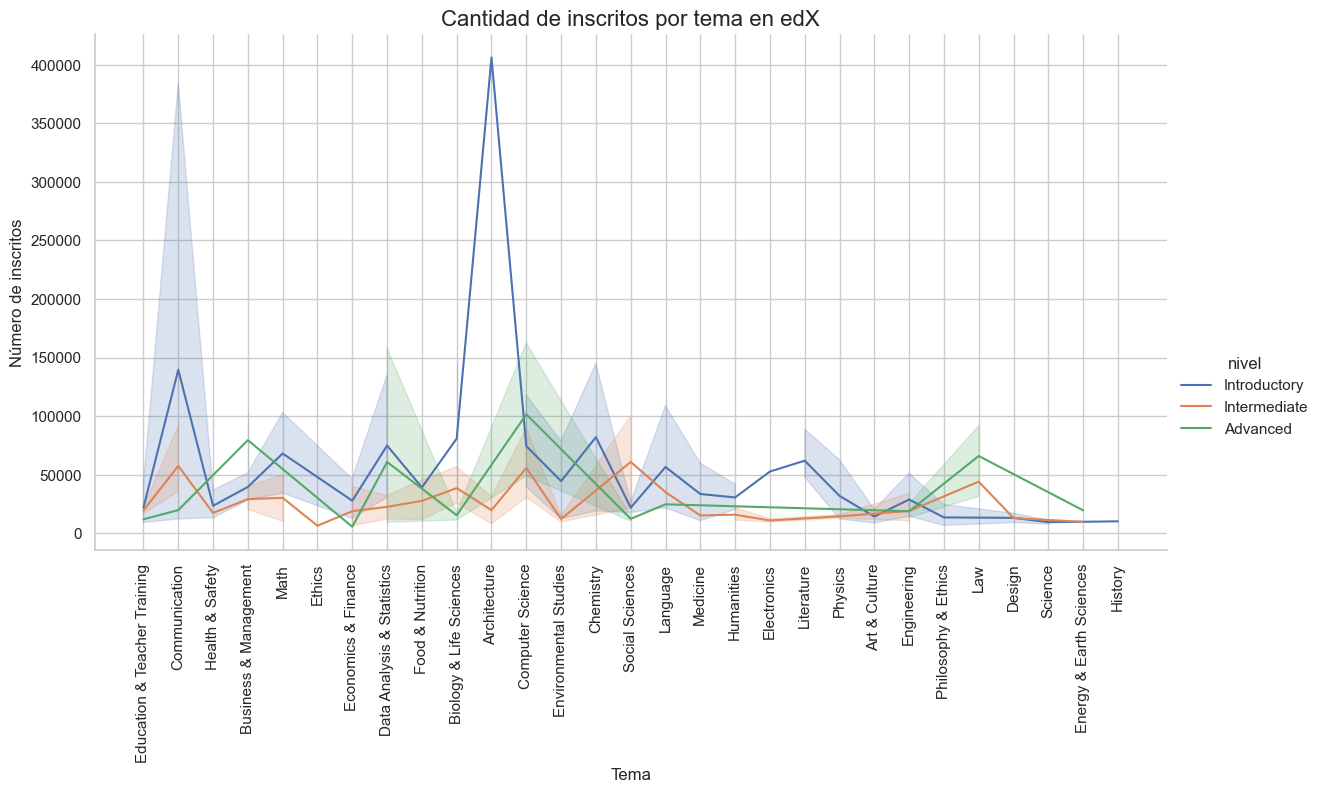

In [48]:
sns.relplot(data=df_edx, x='tema', y='n_inscritos', hue='nivel', kind='line', height=6, aspect=2)
plt.xlabel('Tema')
plt.ylabel('Número de inscritos')
plt.title('Cantidad de inscritos por tema en edX', fontsize=16)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para que se vean completas

plt.show()


 En edX, el tema de "Arquitectura" destaca como el más popular, con una mayor cantidad de inscritos en comparación con otros temas. Esto indica un alto interés de los estudiantes en adquirir conocimientos y habilidades relacionadas con la arquitectura

# Cantidad de cursos por plataforma

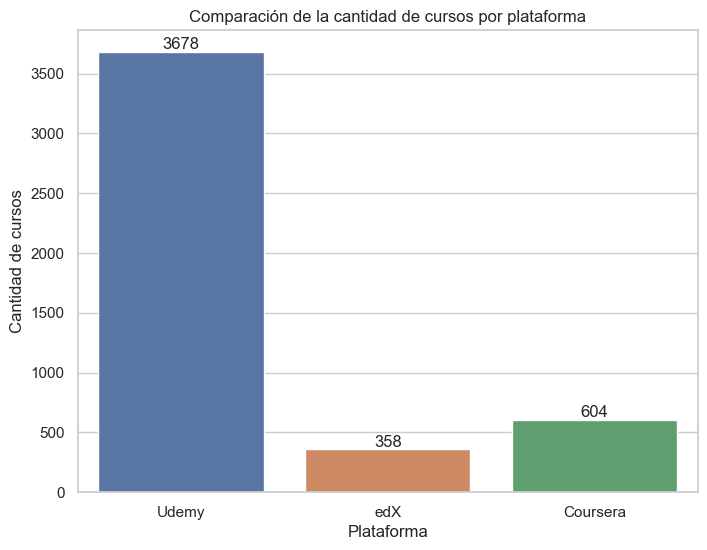

In [16]:

sns.set_theme(style="whitegrid")

udemy_count = len(df_udemy)
edx_count = len(df_edx)
coursea_count = len(df_coursea)

platforms = ['Udemy', 'edX', 'Coursera']
course_counts = [udemy_count, edx_count, coursea_count]

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=platforms, y=course_counts, ax=ax)

ax.set_xlabel('Plataforma')
ax.set_ylabel('Cantidad de cursos')
ax.set_title('Comparación de la cantidad de cursos por plataforma')


for i, count in enumerate(course_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.show()

Udemy tiene un total de 3678 cursos disponibles.
edX cuenta con 358 cursos disponibles.
Coursera ofrece 604 cursos disponibles.
Estos datos demuestran que Udemy tiene la mayor cantidad de cursos en comparación con edX y Coursera. Esto podría deberse a la naturaleza de Udemy, que permite a cualquier persona crear y publicar cursos en la plataforma, lo que ha llevado a una amplia variedad de opciones educativas.

Por otro lado, edX y Coursera, al ser plataformas más enfocadas en instituciones educativas y universidades reconocidas, tienen una menor cantidad de cursos en comparación con Udemy. Sin embargo, es importante destacar que la calidad y el prestigio de los cursos ofrecidos en edX y Coursera suelen ser altos, ya que están respaldados por instituciones académicas reconocidas.

En resumen, mientras Udemy destaca por su amplia oferta de cursos, edX y Coursera se enfocan en brindar opciones educativas de alta calidad respaldadas por instituciones reconocidas. La elección de la plataforma dependerá de los objetivos y preferencias individuales de los estudiantes en busca de cursos en línea.

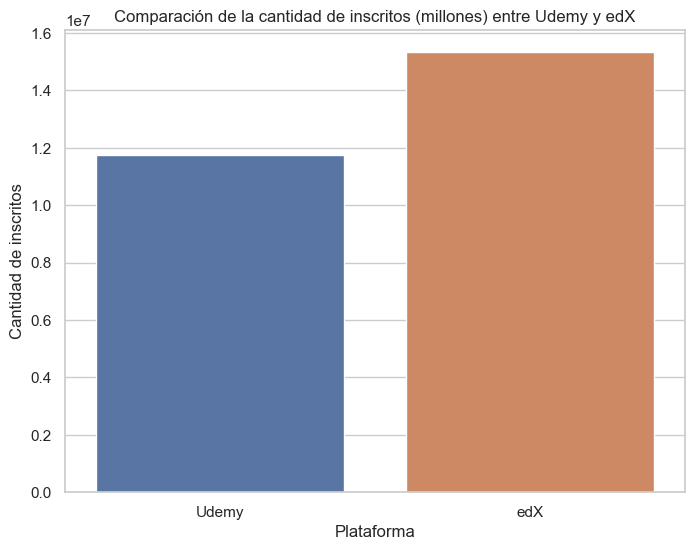

In [17]:
sns.set_theme(style="whitegrid")

# Obtener la cantidad de inscritos por plataforma
udemy_enrolled = df_udemy['n_inscritos'].sum()
edx_enrolled = df_edx['n_inscritos'].sum()

# Crear el gráfico de barras agrupadas
platforms = ['Udemy', 'edX']
enrolled_counts = [udemy_enrolled, edx_enrolled]

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=platforms, y=enrolled_counts, ax=ax)

ax.set_xlabel('Plataforma')
ax.set_ylabel('Cantidad de inscritos')
ax.set_title('Comparación de la cantidad de inscritos (millones) entre Udemy y edX')

# Agregar los minor ticks
ax.minorticks_on()

plt.show()

A pesar de que edX tiene menos cursos disponibles en comparación con las otras plataformas mencionadas, supera a las demás en términos de número de inscritos. 
Esto indica que los cursos ofrecidos por edX atraen a una mayor cantidad de estudiantes, lo cual podría deberse a factores como la reputación de la plataforma, la calidad de los cursos o la temática de los mismos. 
Esta disparidad sugiere que edX ha logrado generar un mayor impacto en términos de participación de los estudiantes a pesar de su menor oferta de cursos.

# Grafica Distribución de duración de cursos en udemy por nivel

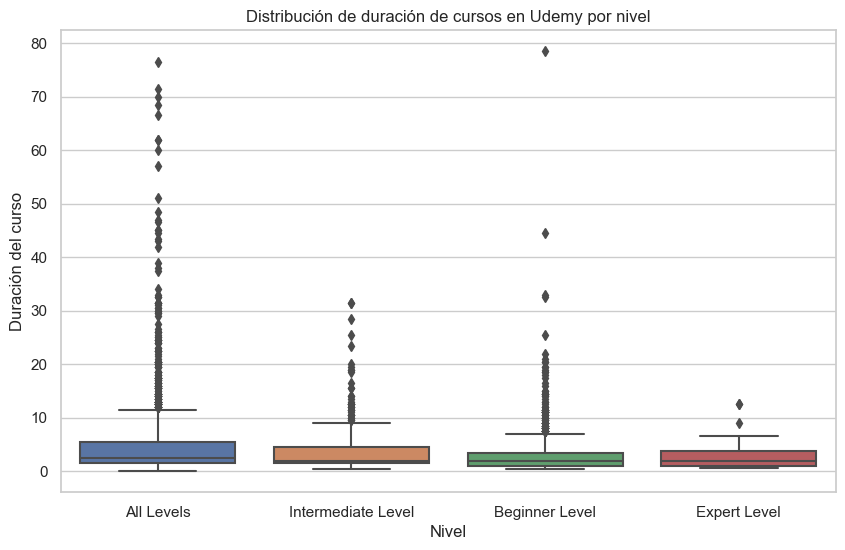

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_udemy, x='nivel', y='duración_contenido')
plt.xlabel('Nivel')
plt.ylabel('Duración del curso')
plt.title('Distribución de duración de cursos en Udemy por nivel')
plt.show()

En Udemy, la duración promedio de los cursos varía según el nivel de dificultad. En general, se observa que la duración promedio de los cursos en cada nivel es de aproximadamente 5 horas. Sin embargo, se destaca que los cursos con mayor duración se encuentran en el nivel "All Levels", lo cual implica que estos cursos están diseñados para adaptarse a diferentes niveles de habilidad y conocimiento. Por otro lado, los cursos con menor duración se encuentran en el nivel de dificultad "Expert Level", lo cual sugiere que estos cursos están dirigidos a personas con un nivel avanzado en el tema y requieren menos tiempo para completarse. Esta información es importante para aquellos interesados en seleccionar cursos de acuerdo a su disponibilidad de tiempo y nivel de experiencia.

# Gráfico de dispersión entre precio y número de inscritos 

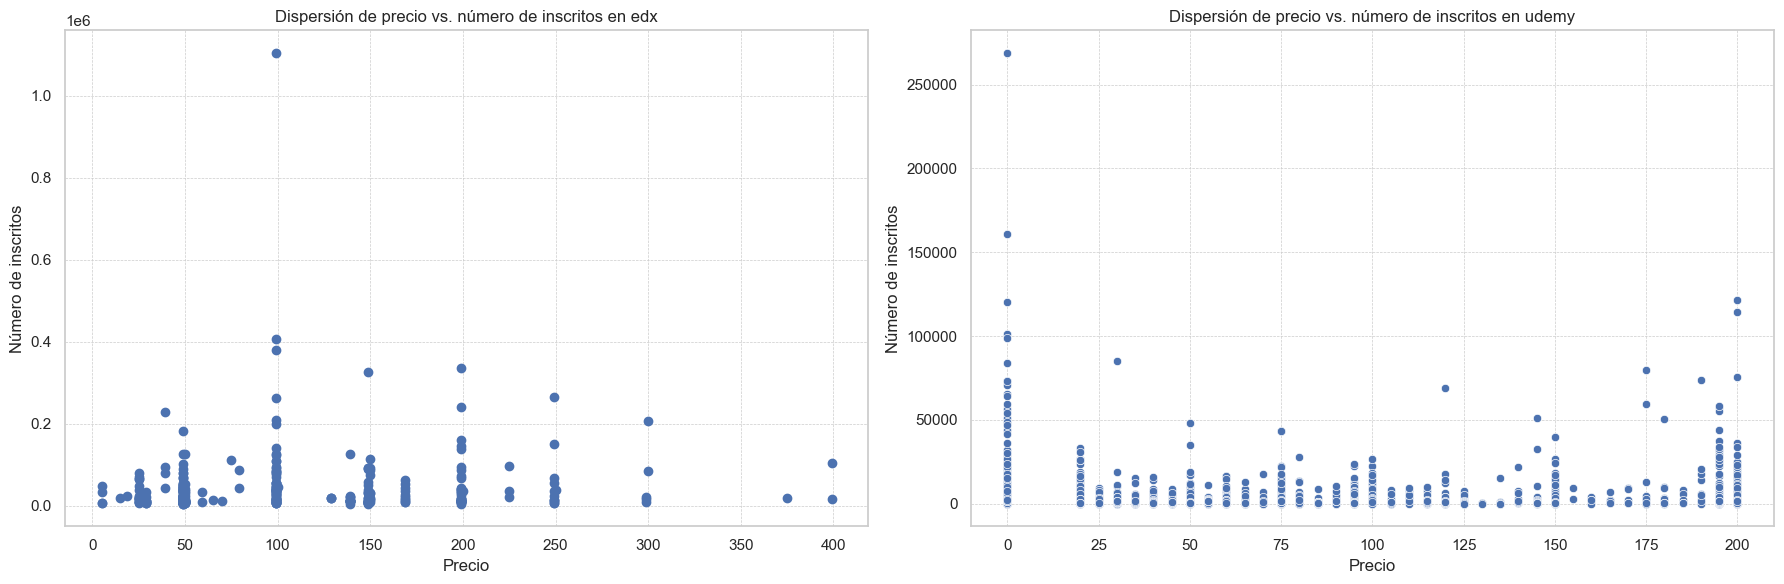

In [19]:

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axes[0].scatter(df_edx['precio'], df_edx['n_inscritos'])
axes[0].set_xlabel('Precio')
axes[0].set_ylabel('Número de inscritos')
axes[0].set_title('Dispersión de precio vs. número de inscritos en edx')

sns.scatterplot(data=df_udemy, x='precio', y='n_inscritos', ax=axes[1])
axes[1].set_xlabel('Precio')
axes[1].set_ylabel('Número de inscritos')
axes[1].set_title('Dispersión de precio vs. número de inscritos en udemy')


axes[0].grid(True, linestyle='--', linewidth=0.5)
axes[1].grid(True, linestyle='--', linewidth=0.5)
axes[0].minorticks_on()
axes[1].minorticks_on()

plt.tight_layout()

plt.show()

En edX, la mayoría de los inscritos se encuentran en cursos con un precio alrededor de 100 dólares, mientras que en Udemy, la mayor cantidad de inscritos se concentra en los cursos gratuitos. En el gráfico de edX, se ve una densidad de cursos en el rango de 0 a 75 dólares, y en Udemy, se observa una densidad en los cursos de 180 a 200 dólares. Estos hallazgos indican que edX ofrece cursos a un precio moderado y que Udemy cuenta con una amplia oferta de cursos gratuitos.

# Cursos por Idioma

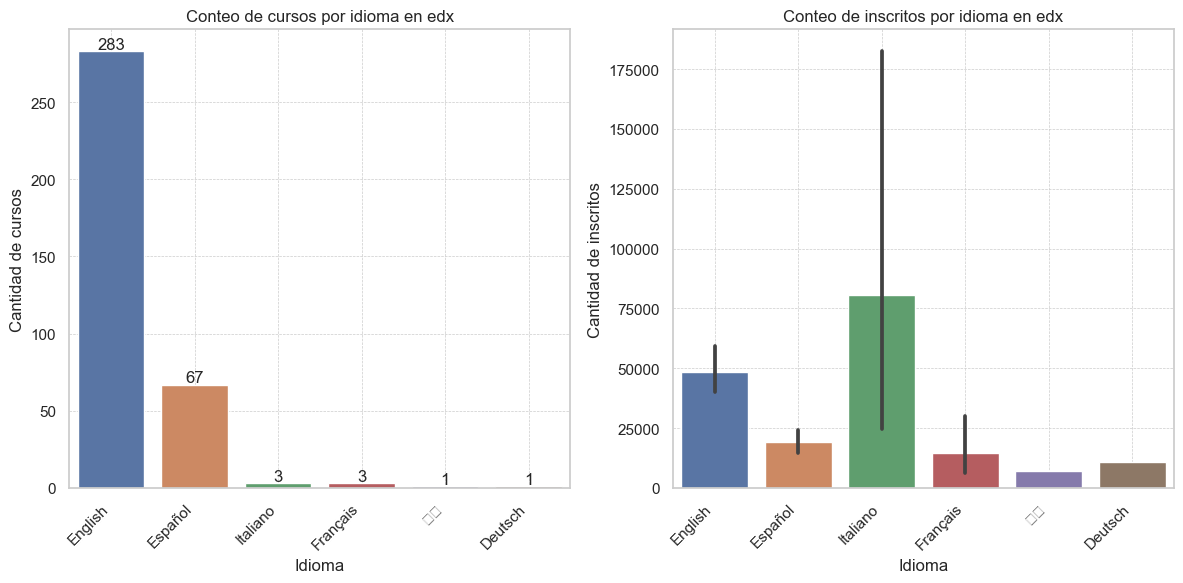

In [20]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Primer plot - Conteo de cursos por idioma en edx
sns.countplot(data=df_edx, x='idioma', ax=axes[0])
axes[0].set_xlabel('Idioma')
axes[0].set_ylabel('Cantidad de cursos')
axes[0].set_title('Conteo de cursos por idioma en edx')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].minorticks_on()

# Mostrar la cantidad total en las barras del primer plot
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Segundo plot - Conteo de inscritos por idioma en edx
sns.barplot(data=df_edx, x='idioma', y='n_inscritos', ax=axes[1])
axes[1].set_xlabel('Idioma')
axes[1].set_ylabel('Cantidad de inscritos')
axes[1].set_title('Conteo de inscritos por idioma en edx')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[0].grid(True, linestyle='--', linewidth=0.5)
axes[1].grid(True, linestyle='--', linewidth=0.5)
axes[0].minorticks_on()
axes[1].minorticks_on()

plt.tight_layout()

plt.show()

En edX, se observa que la mayoría de los cursos se ofrecen en inglés, con un total de 283 cursos. Le sigue el español, con 67 cursos, y en tercer lugar se encuentra el italiano, con solo 3 cursos disponibles. Sin embargo, al analizar la cantidad de inscritos por idioma, se evidencia que el idioma italiano tiene más de 75,000 inscritos, superando al inglés con casi 50,000 inscritos y al español con menos de 25,000 inscritos. Este hallazgo indica que, a pesar de tener una menor cantidad de cursos en italiano, existe una demanda considerable de estudiantes para cursos en este idioma en la plataforma edX.

# Precio vs Nivel

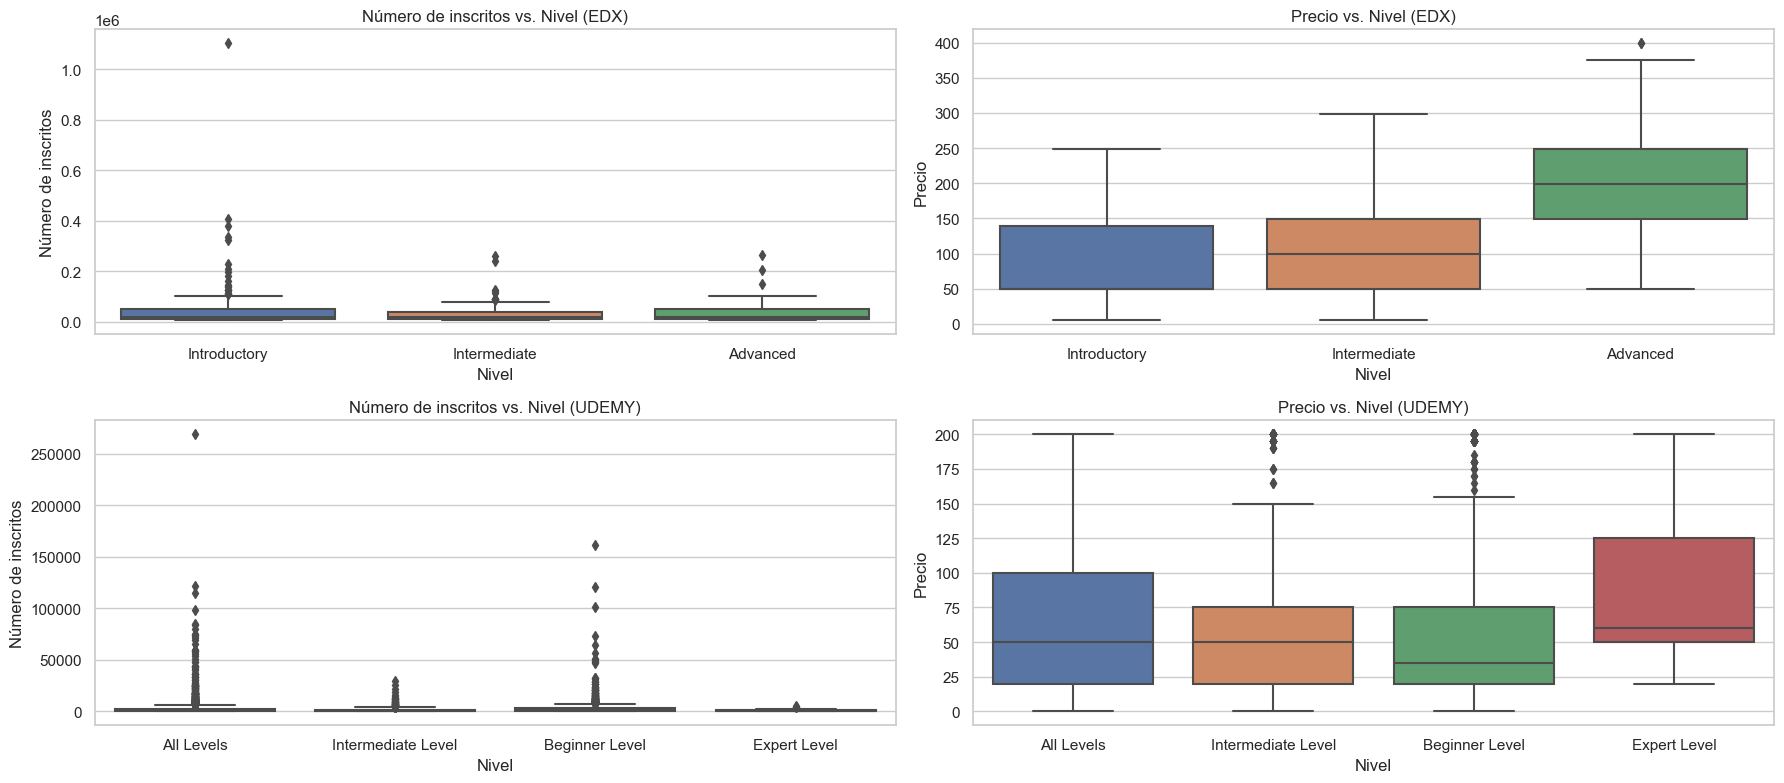

In [21]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 8))

sns.boxplot(data=df_edx, x='nivel', y='n_inscritos', ax=axes[0, 0])
axes[0, 0].set_xlabel('Nivel')
axes[0, 0].set_ylabel('Número de inscritos')
axes[0, 0].set_title('Número de inscritos vs. Nivel (EDX)')

sns.boxplot(data=df_edx, x='nivel', y='precio', ax=axes[0, 1])
axes[0, 1].set_xlabel('Nivel')
axes[0, 1].set_ylabel('Precio')
axes[0, 1].set_title('Precio vs. Nivel (EDX)')

sns.boxplot(data=df_udemy, x='nivel', y='n_inscritos', ax=axes[1, 0])
axes[1, 0].set_xlabel('Nivel')
axes[1, 0].set_ylabel('Número de inscritos')
axes[1, 0].set_title('Número de inscritos vs. Nivel (UDEMY)')

sns.boxplot(data=df_udemy, x='nivel', y='precio', ax=axes[1, 1])
axes[1, 1].set_xlabel('Nivel')
axes[1, 1].set_ylabel('Precio')
axes[1, 1].set_title('Precio vs. Nivel (UDEMY)')

plt.tight_layout()

plt.show()

# Tops

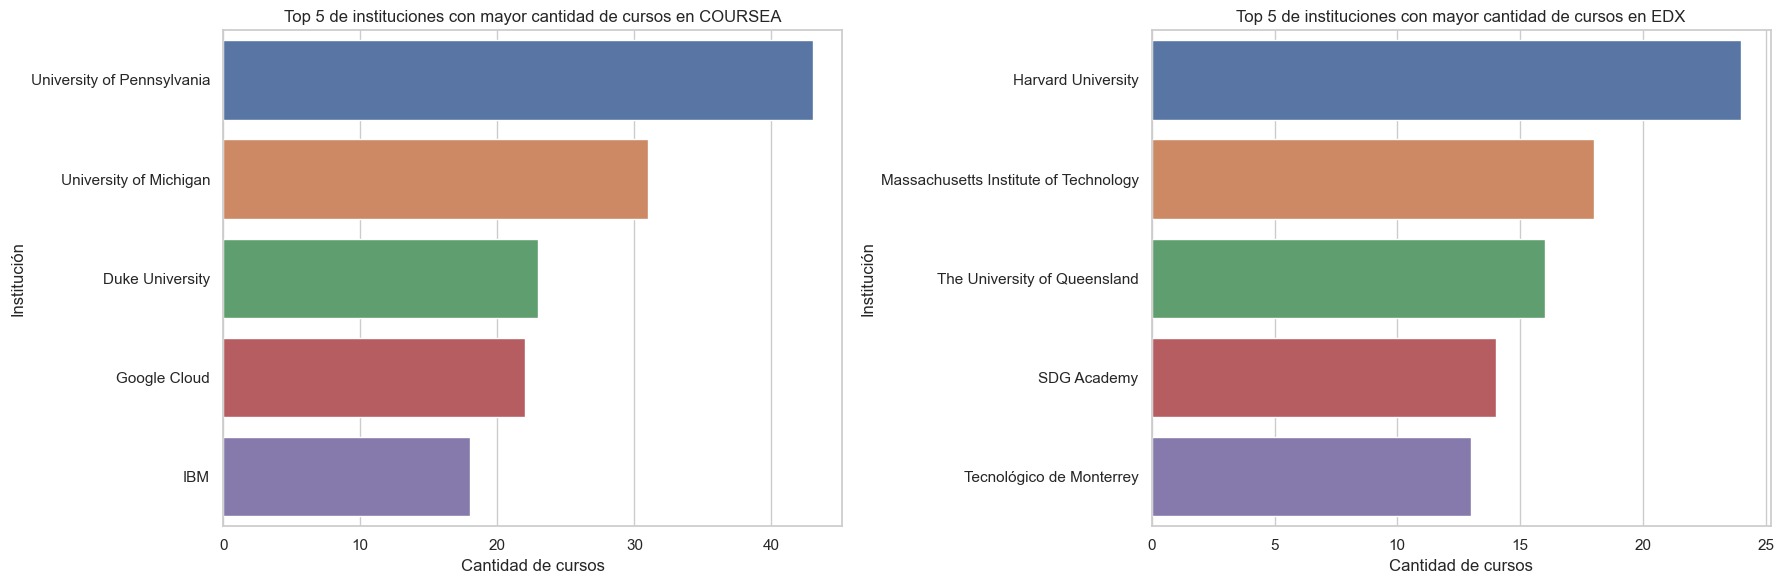

In [22]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

top_instituciones_coursea = df_coursea['institución'].value_counts().head(5)
sns.barplot(x=top_instituciones_coursea.values, y=top_instituciones_coursea.index, ax=axes[0])
axes[0].set_xlabel('Cantidad de cursos')
axes[0].set_ylabel('Institución')
axes[0].set_title('Top 5 de instituciones con mayor cantidad de cursos en COURSEA')

top_instituciones_edx = df_edx['institución'].value_counts().head(5)
sns.barplot(x=top_instituciones_edx.values, y=top_instituciones_edx.index, ax=axes[1])
axes[1].set_xlabel('Cantidad de cursos')
axes[1].set_ylabel('Institución')
axes[1].set_title('Top 5 de instituciones con mayor cantidad de cursos en EDX')

plt.tight_layout()

plt.show()

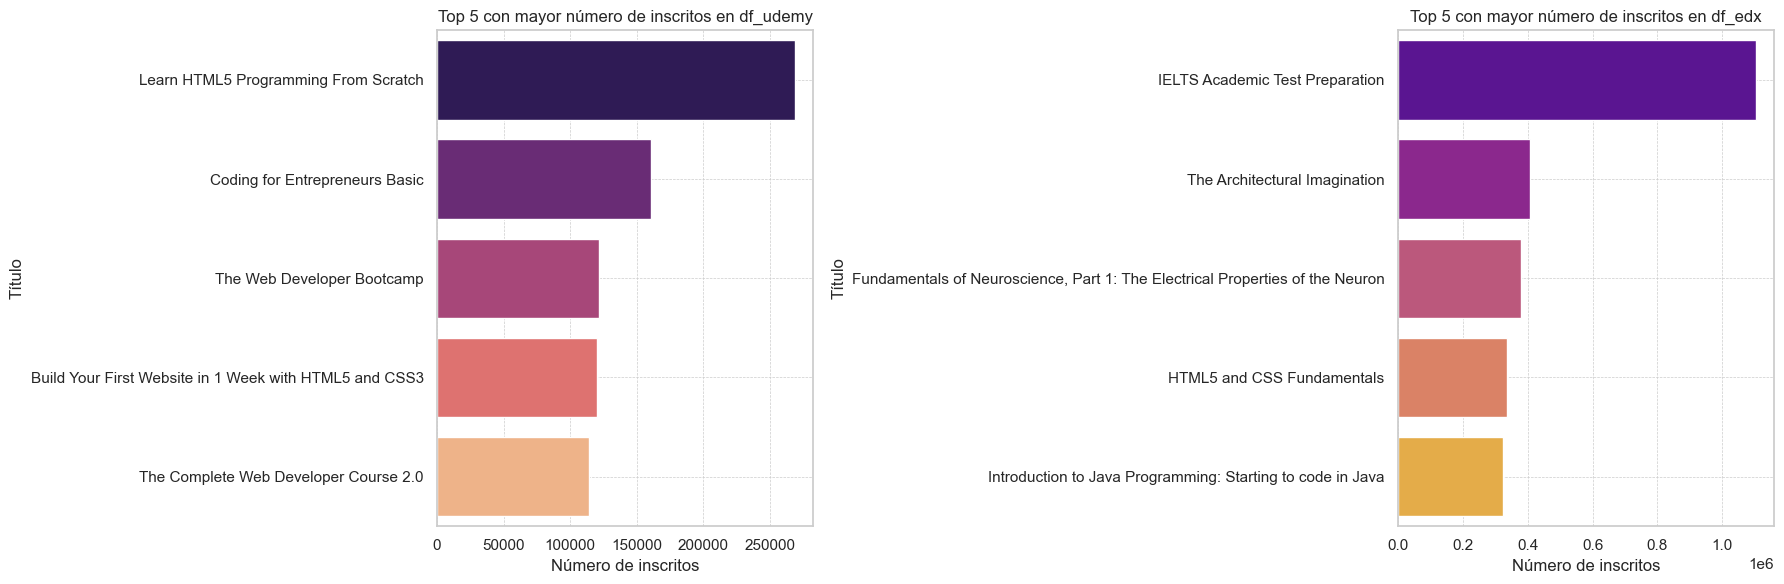

In [23]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Top 5 con mayor número de inscritos en df_udemy
top_subscribers_udemy = df_udemy.nlargest(5, 'n_inscritos')
sns.barplot(data=top_subscribers_udemy, x='n_inscritos', y='titulo', ax=axes[0], palette='magma')
axes[0].set_xlabel('Número de inscritos')
axes[0].set_ylabel('Título')
axes[0].set_title('Top 5 con mayor número de inscritos en df_udemy')
axes[0].grid(True, linestyle='--', linewidth=0.5)
axes[0].minorticks_on()

# Top 5 con mayor número de inscritos en df_edx
top_enrollments_edx = df_edx.nlargest(5, 'n_inscritos')
sns.barplot(data=top_enrollments_edx, x='n_inscritos', y='titulo', ax=axes[1], palette='plasma')
axes[1].set_xlabel('Número de inscritos')
axes[1].set_ylabel('Título')
axes[1].set_title('Top 5 con mayor número de inscritos en df_edx')
axes[1].grid(True, linestyle='--', linewidth=0.5)
axes[1].minorticks_on()

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

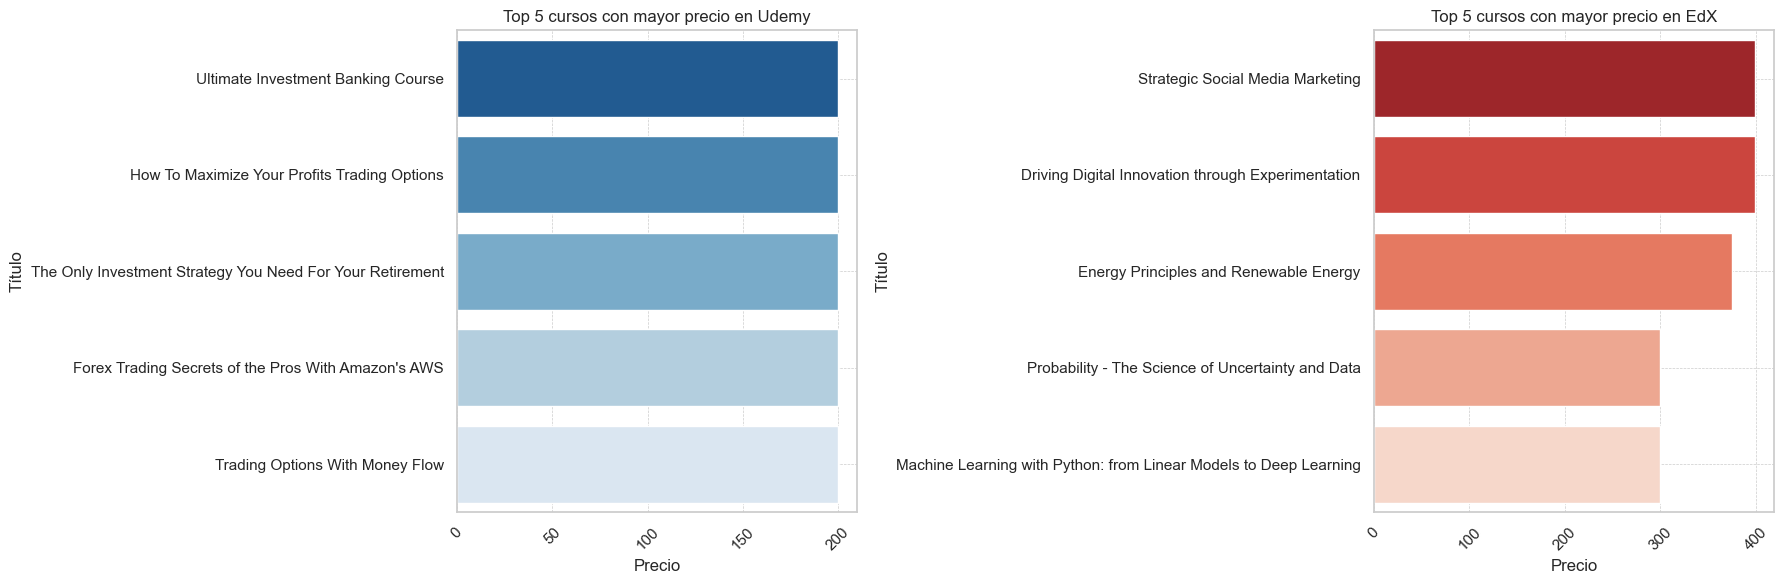

In [24]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Top 5 cursos con mayor precio en Udemy
top_price_udemy = df_udemy.nlargest(5, 'precio')
sns.barplot(data=top_price_udemy, x='precio', y='titulo', ax=axes[0], palette='Blues_r')
axes[0].set_xlabel('Precio')
axes[0].set_ylabel('Título')
axes[0].set_title('Top 5 cursos con mayor precio en Udemy')
axes[0].grid(True, linestyle='--', linewidth=0.5)
axes[0].minorticks_on()
axes[0].tick_params(axis='x', rotation=45)  # Rotación de las etiquetas del eje x

# Top 5 cursos con mayor precio en EdX
top_price_edx = df_edx.nlargest(5, 'precio')
sns.barplot(data=top_price_edx, x='precio', y='titulo', ax=axes[1], palette='Reds_r')
axes[1].set_xlabel('Precio')
axes[1].set_ylabel('Título')
axes[1].set_title('Top 5 cursos con mayor precio en EdX')
axes[1].grid(True, linestyle='--', linewidth=0.5)
axes[1].minorticks_on()
axes[1].tick_params(axis='x', rotation=45)  # Rotación de las etiquetas del eje x

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

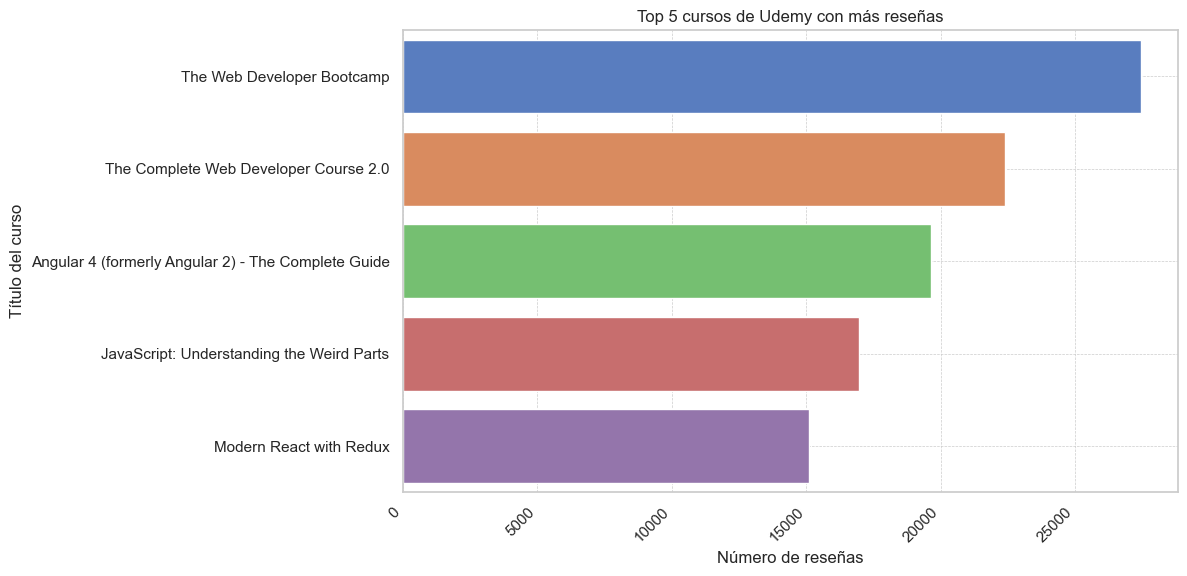

In [25]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Top 5 cursos con más reseñas en Udemy
top_reviews_udemy = df_udemy.nlargest(5, 'n_reviews')
sns.barplot(data=top_reviews_udemy, x='n_reviews', y='titulo', palette='muted')
axes.set_xlabel('Número de reseñas')
axes.set_ylabel('Título del curso')
axes.set_title('Top 5 cursos de Udemy con más reseñas')
axes.grid(True, linestyle='--', linewidth=0.5)
axes.minorticks_on()
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

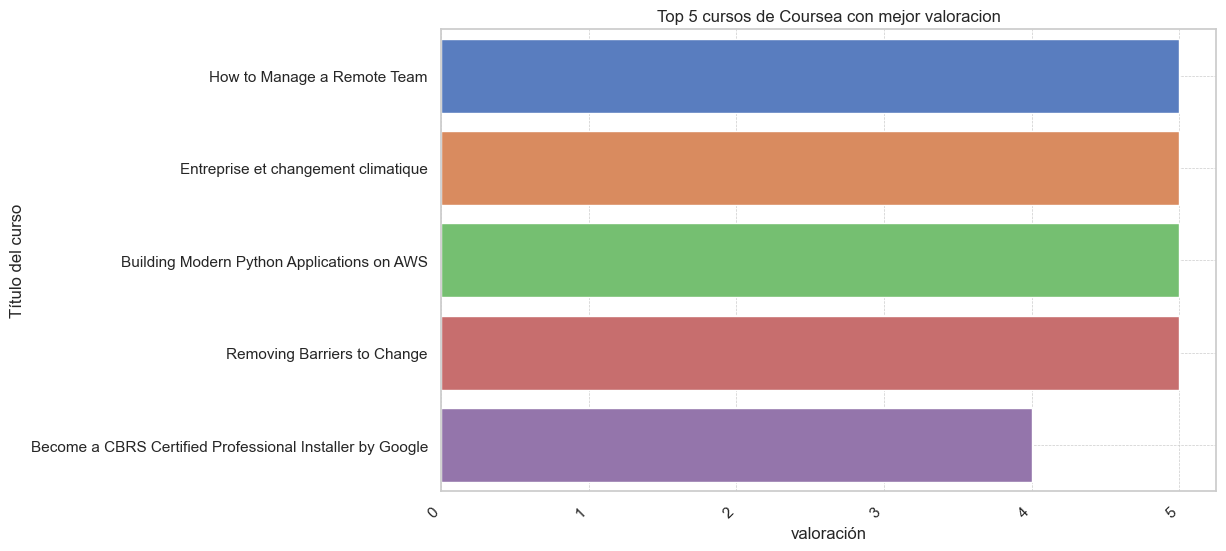

In [30]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Top 5 cursos con más reseñas en Udemy
top_reviews_udemy = df_coursea.nlargest(5, 'valoración')
sns.barplot(data=top_reviews_udemy, x='valoración', y='titulo', palette='muted')
axes.set_xlabel('valoración')
axes.set_ylabel('Título del curso')
axes.set_title('Top 5 cursos de Coursea con mejor valoracion')
axes.grid(True, linestyle='--', linewidth=0.5)
axes.minorticks_on()
plt.xticks(rotation=45, ha='right')

# Matrices de Correlacion

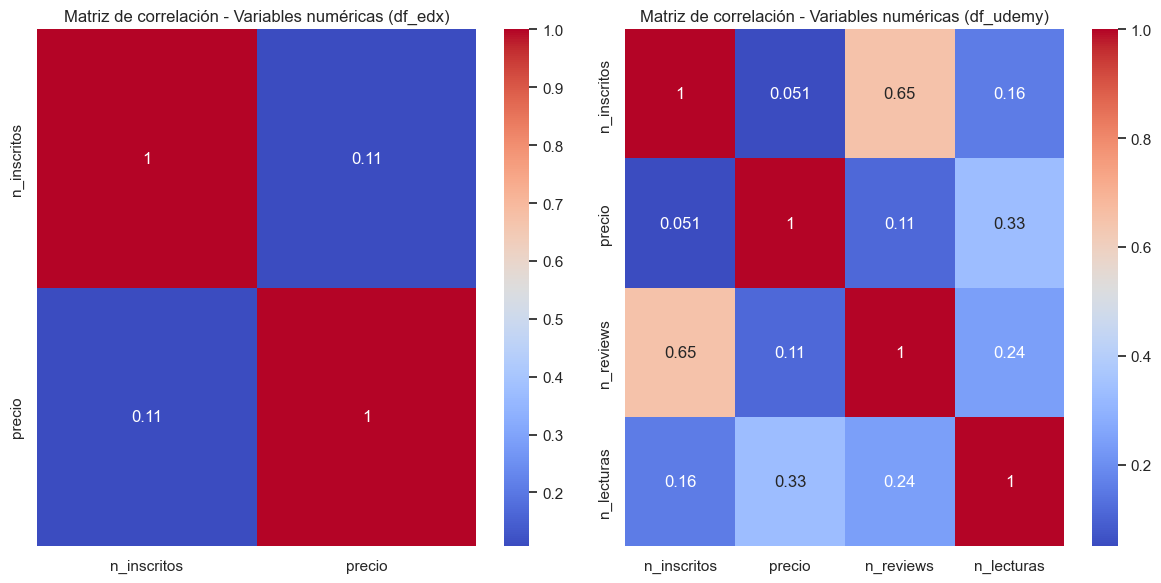

In [26]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico 1: Matriz de correlación para variables numéricas en df_edx
corr_edx = df_edx[['n_inscritos', 'precio']].corr()

sns.heatmap(corr_edx, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Matriz de correlación - Variables numéricas (df_edx)')

# Gráfico 2: Matriz de correlación para variables numéricas en df_udemy
corr_udemy = df_udemy[['n_inscritos', 'precio', 'n_reviews', 'n_lecturas']].corr()

sns.heatmap(corr_udemy, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Matriz de correlación - Variables numéricas (df_udemy)')

# Añadir grillas y subdivisiones entre los valores
axes[0].grid(True, linestyle='--', linewidth=0.5)
axes[1].grid(True, linestyle='--', linewidth=0.5)
axes[0].minorticks_on()
axes[1].minorticks_on()

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# WordCloud

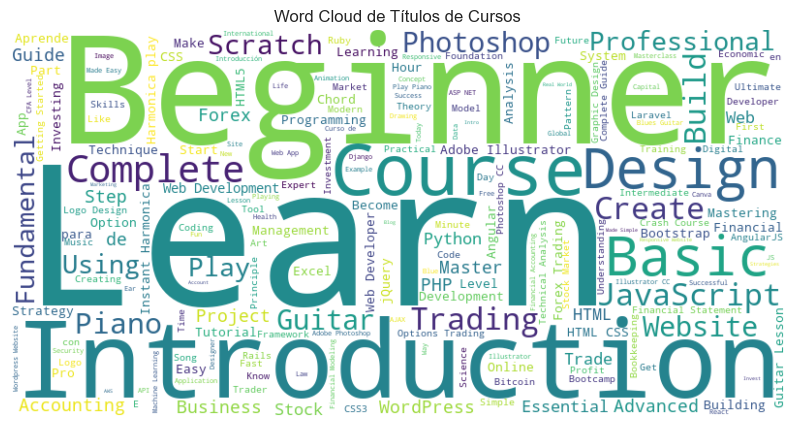

In [60]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Obtener los títulos de los cursos de los tres DataFrames
titles = pd.concat([df_edx['titulo'], df_udemy['titulo'], df_coursea['titulo']])

# Obtener las stopwords en inglés
stopwords_eng = set(stopwords.words('english'))

# Crear una instancia de WordCloud con las configuraciones deseadas
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_eng).generate(' '.join(titles))

# Configurar la visualización del Word Cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Títulos de Cursos')
plt.show()

Los términos más relevantes en los títulos de los cursos incluyen "Learn 1.0", "Beginner", "Introduction" y "Course". Esto indica que los cursos suelen enfocarse en brindar una introducción y una base de conocimientos para principiantes.

Otros términos frecuentes son "Design", "Basic", "Complete" y "JavaScript", lo que sugiere que hay una oferta considerable de cursos relacionados con el diseño, los fundamentos básicos y el lenguaje de programación JavaScript.

Algunos términos específicos, como "Trading", "Piano", "Photoshop" y "Guitar", indican la presencia de cursos especializados en áreas como el comercio, la música y la edición de imágenes.

También se observan términos como "Create", "Build" y "Website", lo que sugiere una oferta de cursos relacionados con la creación y construcción de sitios web.

Otro término interesante es "Scratch", que puede referirse tanto a un lenguaje de programación visual para niños como a técnicas de rascado en el ámbito artístico.

# Conclusiones 

La plataforma Coursera cuenta con la mayor cantidad de cursos disponibles, con un total de 3,678 cursos, seguida de edX con 358 cursos y Udemy con 604 cursos.

Udemy experimentó un crecimiento significativo en el número de inscritos hasta el año 2015, alcanzando un máximo de 3.5 millones de inscritos. Sin embargo, posteriormente experimentó una fuerte caída, quedando con 1 millón de inscritos en la última fecha proporcionada en el dataset.

Se observa que el tema de "Desarrollo web" es el más popular en Udemy, con la mayor cantidad de inscritos en comparación con otros temas ofrecidos en la plataforma. Esta alta demanda sugiere un fuerte interés por parte de los usuarios en adquirir conocimientos y habilidades relacionadas con el desarrollo web. Esta información puede ser útil para la toma de decisiones estratégicas en la creación y promoción de cursos en Udemy, enfocándose en el desarrollo web como una oportunidad para atraer a una amplia audiencia de estudiantes.

En edX, el tema de "Arquitectura" destaca como el más popular, con una mayor cantidad de inscritos en comparación con otros temas. Esto indica un alto interés de los estudiantes en adquirir conocimientos y habilidades relacionadas con la arquitectura

Los cursos de edX tienen un rango de precios más alto, con la mayoría de cursos costando entre 50 y 75 USD. En contraste, los cursos de Udemy se sitúan en el rango de 25 a 50 USD, y también cuenta con una amplia oferta de más de 250 cursos gratuitos.

En Udemy, la duración media de los cursos por nivel se sitúa en aproximadamente 5 horas de duración, siendo los cursos de nivel "all levels" los que tienen mayor duración y los de nivel "expert" los de menor duración.

Edx tiene una mayor cantidad de inscritos en cursos de 100 USD, mientras que en Udemy la mayor cantidad de inscritos se encuentran en los cursos gratuitos. En el gráfico de edX se observa una densidad de cursos en el rango de 0 a 75 USD, pero también hay una distribución equilibrada hasta los 250 USD. En Udemy, se aprecia una densidad de cursos en el rango de 180 a 200 USD.

En edX, la mayoría de los cursos se ofrecen en inglés, seguidos por el español y el italiano. Sin embargo, al analizar la cantidad de inscritos por idioma, se observa que el italiano tiene una cantidad significativa de inscritos, superando incluso al inglés y al español en términos de número de inscritos.

Estas conclusiones nos brindan una visión general sobre la oferta de cursos, precios, inscritos y distribución por idioma en las plataformas estudiadas, lo cual puede ser de utilidad para tomar decisiones estratégicas en el mercado de cursos online.
